In [1]:
import torch
import matplotlib.pyplot as plt

In [8]:
sin = lambda z : z/3 + torch.sin(z*3)+ torch.sin(z)**2 - 1.50

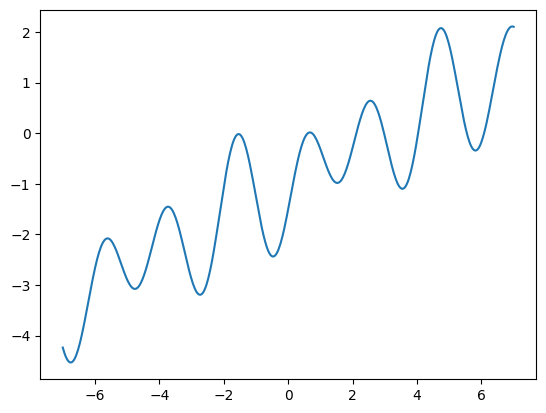

In [21]:
tt = torch.linspace(-7,7, 500)
plt.plot(tt,sin(tt))

In [22]:
w  = lambda z: torch.softmax(torch.cat([sin(z).unsqueeze(-1), 0.5*torch.zeros_like(sin(z)).unsqueeze(-1)], dim = -1), dim = -1)

In [23]:
print(w(tt).shape)

torch.Size([500, 2])


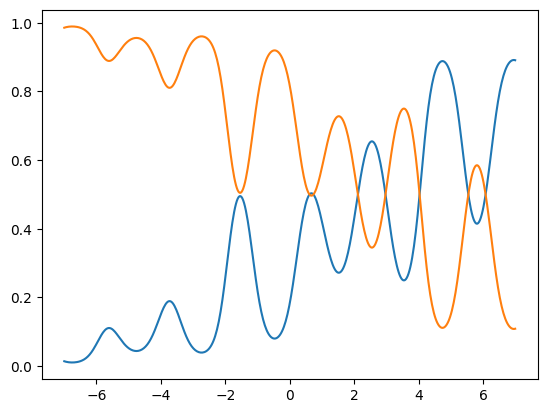

In [24]:
plt.plot(tt,w(tt)[:,0])
plt.plot(tt,w(tt)[:,1])

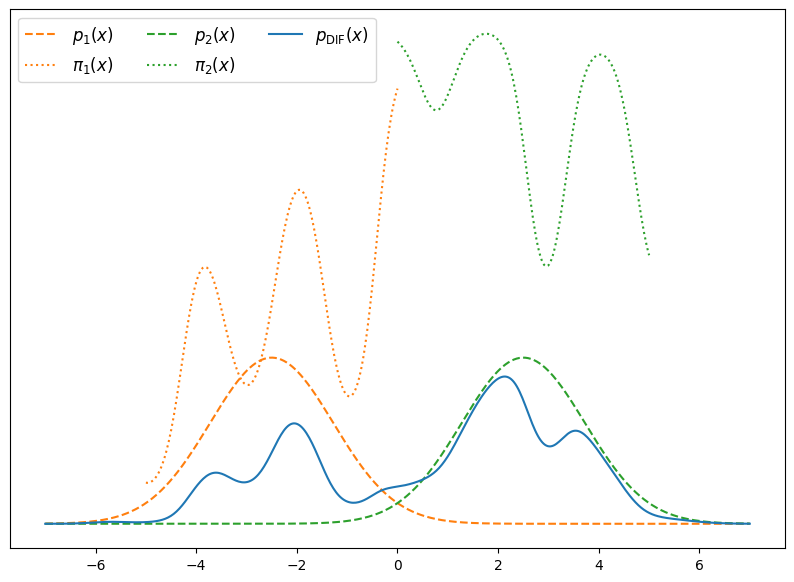

In [27]:
plt.figure(figsize = (10,7))
ax = plt.subplot(111)
ax.tick_params(left=False,bottom=True,labelleft=False,labelbottom=True)
gauss0 = torch.distributions.MultivariateNormal(torch.tensor([-2.5]), 1.5*torch.eye(1))
gauss1 = torch.distributions.MultivariateNormal(torch.tensor([2.5]), 1.5*torch.eye(1))
ax.plot(tt, torch.exp(gauss0.log_prob(tt.unsqueeze(-1))), color = 'C1', linestyle = '--',label = r'$p_1(x)$')
tt0 = torch.linspace(-5, 0, 200)
ax.plot(tt0, w(tt0 + 4.5)[:,0], color = 'C1', linestyle = 'dotted', label =  r'$\pi_1(x)$')
ax.plot(tt, torch.exp(gauss1.log_prob(tt.unsqueeze(-1))), color = 'C2', linestyle = '--', label = r'$p_2(x)$')
tt1 = torch.linspace(0,5, 200)
ax.plot(tt1, w(tt1 - 4.5)[:,1], color = 'C2', linestyle = 'dotted', label = r'$\pi_2(x)$')
ax.plot(tt,w(tt + 4.5)[:,0]*torch.exp(gauss0.log_prob(tt.unsqueeze(-1))) + w(tt-4.5)[:,1]*torch.exp(gauss1.log_prob(tt.unsqueeze(-1))), color = 'C0', label = r'$p_{\rm{DIF}}(x)$')
plt.legend(ncol = 3, fontsize = 12)